# Связывание типов

Структура:

1) модуль typing

2) датаклассы

3) перечисления

4) композиция

5) протоколы

Внимание! Примеры из этой лекции лучше посмотреть в IDE

## Модуль typing 

Модуль `typing` обеспечивает поддержку выполнения аннотации типов.

Интерпретатор Python не проверяет аннотации типов. Их могут использовать сторонние инструменты, такие как средства проверки типов, IDE, линтеры и т. д.

Можно создавать псевдонимы типа, используя сложные структуры, составленные из базовых типов

Базовые типы:
- `None`
- `int`
- `str`
- `float`
- `complex`
- `typing.List`
- `typing.Dict`
- `typing.Tuple`
- `typing.Any` - ожидаем любой тип
- ...

In [ ]:
import json
from typing import Dict, List, Any

Json = Dict[str, Any]

class Metro:
    def __init__(self, metro_id: int, distance: int):
        self.id = metro_id
        self.distance = distance
    def __repr__(self):
        return f'Metro(metro_id={self.id}, distance={self.distance})'
    
    
def parse_string(raw_string: str) -> Json:
    return json.loads(raw_string)


def get_metro_stations(raw_string: str) -> List[Metro]:
    raw_metro_stations = parse_string(raw_string)['metro_stations']
    result: List[Metro] = []
    for i in raw_metro_stations:
        m = Metro(**i)
        result.append(m)
    return result
    
string = '''{
    "city" : "Москва",
    "street" : "площадь Революции",
    "building" : "3",
    "description" : null,
    "raw" : "Москва, площадь Революции, 3",
    "metro_stations" : [{"metro_id": 2, "distance": 150}, {"metro_id": 5, "distance": 270}],
    "id" : "3"
}'''

print(get_metro_stations(string))

`Optional` позволяет указать на тип объекта как на необязательный

In [ ]:
from typing import Optional
from json import JSONDecodeError

# Optional[Json] == Union[Json, None]

def parse_string(raw_string: str) -> Optional[Json]:
    try:
        result = json.loads(raw_string)
    except JSONDecodeError:
        result = None
    else:
        return result
    
parse_string("\\")

`Union` указывает на некотоорые допустимые типы

In [ ]:
from typing import Union

Numeric = Union[int, float]


def plus(a: Numeric, b: Numeric) -> Numeric:
    return a + b

plus(1, 4)

In [ ]:
plus('1', '4')

`Callable` позволяет аннотировать функции

In [ ]:
from typing import Callable, List, Any
from functools import partial

def mmap(func: Callable, sequence: List[Any]) -> List[Any]:
    result = []
    for i in sequence:
        result.append(func(i))
    return result

mmap(partial(pow, exp=2), [1, 2, 3])

Можно определить Generic-типы

`TypeVar` позволяет задать переменную любого типа, которую можно подставить при указании

In [ ]:
from typing import TypeVar, Generic

T = TypeVar('T')

class Stack(Generic[T]):
    def __init__(self) -> None:
        self.items: List[T] = []

    def push(self, item: T) -> None:
        self.items.append(item)

    def pop(self) -> T:
        return self.items.pop()

    def empty(self) -> bool:
        return not self.items

In [ ]:
s_int = Stack[int]()
s_str = Stack[str]()
s_int.push(1)
s_str.push('1')

Для проверки типов можно воспользоваться инструментом `mypy`

In [ ]:
pip install mypy

In [ ]:
!mypy -m to_mupy

В чём же ошибка?

Таким образом, аннотации типов нужны для того чтобы ограничить возможные типы объектов

## Датаклассы

[Классы данных](https://docs.python.org/3/library/dataclasses.html)

Модуль `dataclasses` содержит декоратор `@dataclass`. Аннотации типов при объявлении датакласса являются обязательными

In [ ]:
from typing import Optional
from dataclasses import dataclass

@dataclass
class Metro:
    metro_id: int
    distance: Optional[int] = None
        
m1 = Metro(3)
m2 = Metro(4, 1440)
m1, m2

In [ ]:
m1.distance = 100
m1.name = 'Охотный ряд'
m1, m1.name

Можно определить датаклассы только на чтение

In [ ]:
@dataclass(frozen=True)
class Metro:
    id: int
    distance: Optional[int] = None
        
m1 = Metro(3)
m1

In [ ]:
m1.distance = 100

Есть возможность настроить поведение класса данных вплоть до отдельных полей с использованием функции `field`. Обычно это нужно, если требуется задать изменяемое значение по-умолчанию

In [ ]:
from typing import List

@dataclass
class Line:
    length: int
    stations: List[Metro] = []

In [ ]:
from dataclasses import field

@dataclass
class Line:
    length: int
    stations: List[Metro] = field(default_factory=list)

## Перечисления

https://docs.python.org/3/library/enum.html

Enum - это набор символьных имен, привязанных к уникальным значениям. Перечисления полезны, когда у нас есть переменная, которая может принимать одно значение из ограниченного набора

In [ ]:
from enum import Enum, auto

class Color(Enum):
    RED = 2  # так как перечисления предоставляют константы, используется наименование UPPER_CASE
    GREEN = auto()  # различные техники связывания значений только для примера. Лучше использовать что-то одно
    BLUE = 'это не просто синий!'

In [ ]:
@dataclass
class Car:
    color: Color = Color.BLUE
        
c1 = Car()
c2 = Car(Color.GREEN)
c1, c2

In [ ]:
c2 = Car(Color.BLACK)

In [ ]:
Color['RED']

In [ ]:
Color(3)

In [ ]:
Color(4)

Таким образом, перечисления нужны для того чтобы ограничить возможные значения объектов

## Композиция

В объектно-ориентированном программировании под агрегированием подразумевают методику создания нового класса из уже существующих классов путём их включения. Об агрегировании также часто говорят как об «отношении принадлежности»

Агрегация (агрегирование по ссылке) — отношение «часть-целое» между двумя равноправными объектами, когда один объект (контейнер) имеет ссылку на другой объект. Оба объекта могут существовать независимо: если контейнер будет уничтожен, то его содержимое — нет.

Композиция (агрегирование по значению) — более строгий вариант агрегирования, когда включаемый объект может существовать только как часть контейнера. Если контейнер будет уничтожен, то и включённый объект тоже будет уничтожен. 

Это строгие определения, которые вообще говоря следует знать.

Но далее мы будем говорить о композиции как об агрегировании. Композиция позволяет составным классам повторно использовать реализацию компонентов, которые она содержит. Составной класс не наследует интерфейс класса компонента, но может использовать его реализацию. Композиционные отношения между двумя классами считаются **слабосвязанными**. Это означает, что изменения в классе компонентов редко влияют на составной класс, а изменения в составном классе вообще не влияют на класс компонентов.

Таким образом, композиция - очень гибкий подход.

## Протоколы

Протоколы - cтруктурная типизация в Python

При номинальной типизации (nominal type system) совместимость типов определяется, основываясь на явных декларациях в коде программы, например, на именах классов и иерархии наследования. Если класс `B` явно объявлен наследником класса `A`, то объекты класса `B` могут быть использованы везде, где ожидаются объекты класса `A`

Структурная типизация (structural type system) определяет совместимость типов на основе структуры этих типов, а не на явных декларациях. Подобный механизм может рассматриваться как некоторый аналог утиной типизации. 

```
Структурная типизация распространена довольно широко. Интерфейсы в Go – это набор методов, которые определяют некоторую функциональность. Типы, реализующие интерфейсы в Go не обязаны декларировать каким-либо образом, что они реализуют данный интерфейс, достаточно просто реализовать соответствующие методы интерфейса.
```

#### Почему утиная?
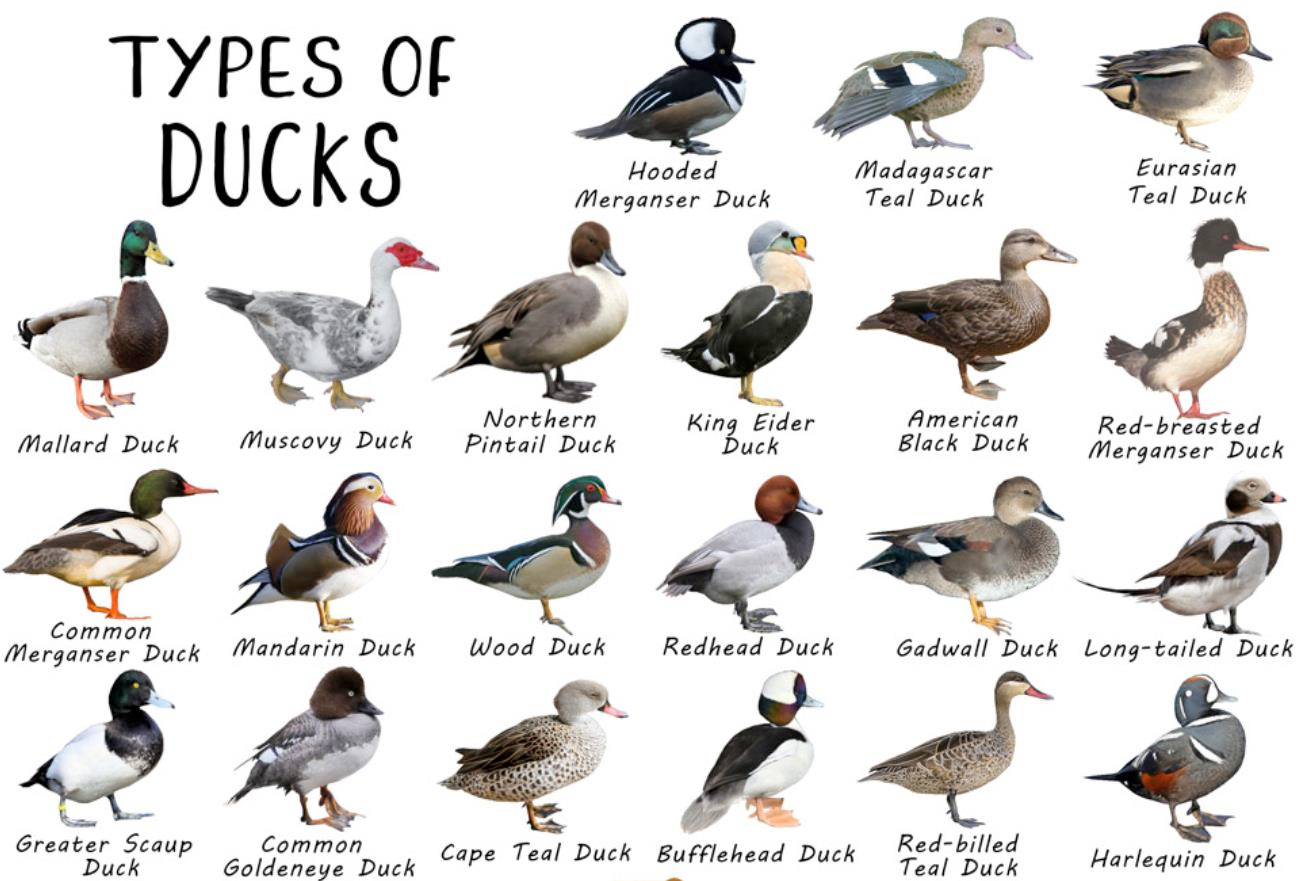


В англоязычных странах широко распространён "утиный тест": "Если это выглядит как утка, плавает как утка и крякает как утка, то это, вероятно, и есть утка. ", с которым, в свою очередь связана неявная или утиная типизация: считается что объект (класс) реализует интерфейс если он содержит все методы этого интерфейса. 


`Mypy` имеет возможность использовать структурную типизацию в дополнение к номинальной для проверки корректности кода на Python

In [3]:
from dataclasses import dataclass
from typing import Protocol

class EngineProtocol(Protocol):
    def run(self):
        ...
        
@dataclass
class PetrolEngine(EngineProtocol):
    def run(self):
        print('ж-ж-ж')

    def stall(self):
        print('заглох')

@dataclass
class JetEngine(EngineProtocol):
    def run(self):
        print('у-у-у')

    def fly(self):
        print('летим')

@dataclass
class Car:
    engine: EngineProtocol
        
    def poehali(self):
        self.engine.run()
        
p = PetrolEngine()
j = JetEngine()
c = Car(p)
c.poehali()

ж-ж-ж


In [4]:
c = Car(j)
c.poehali()

у-у-у


In [6]:
!mypy -m protocols

Success: no issues found in 1 source file


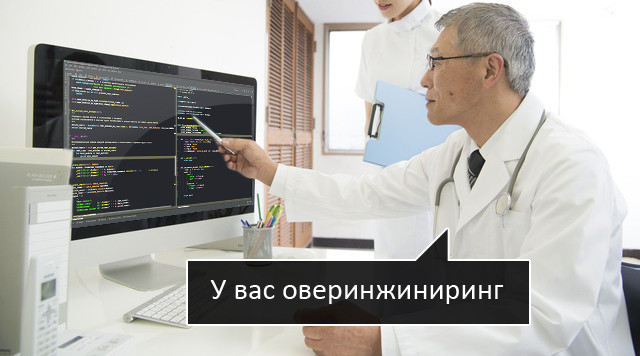